In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 4096
FOV = 10e-3
dx = FOV/N

E0 = 9500

beam_params = {
    'photonEnergy': E0-1,
    'N': N,
    'sigma_x': 15e-6,
    'sigma_y': 15e-6,
    'z0x': 110,
    'z0y': 110,
    'rangeFactor': 5,
    'scaleFactor': 20,
    'z_source': 630
}

In [3]:
b1 = beam.Beam(beam_params=beam_params)

mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286, orientation=2)

alphaAsym = 5*np.pi/180

# slit = optics.Slit('slit', z=989.9, x_width=20e-6, y_width=500e-6)
entrance_slit = optics.Slit('entrance', z=989, x_width=.5e-3, y_width=.5e-3)

crystal1 = optics.Crystal('c1', hkl=[2,2,0], length=1e-2, width=10e-3, z=990, E0=E0,
                          alphaAsym=0, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.012, E0=E0,alphaAsym=alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.112, E0=E0,alphaAsym=0, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[2,2,0], length=1e-2, width=10e-3, z=990.124, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)

crl1 = optics.CRL('crlx', z=990.15, roc=7e-6)
crl2 = optics.CRL('crly', z=990.15,orientation=1, roc=7e-6)
slit = optics.Slit('slit', z=990.2, x_width=500e-6, y_width=500e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

IP = optics.PPM('IP', FOV=50e-6, z=991.08, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=entrance_slit.z + .05, N=256)

# YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 4, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)

# devices = [mr1l0,mr2l0,upstream_YAG]
devices = [mr1l0,mr2l0,entrance_slit,upstream_YAG, downstream_YAG, IP,crystal1,crystal2,crystal3,crystal4, slit]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal2.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 359.94241998612466 microns
FWHM in y: 359.94241998612466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415750474835558
5.415750474835558
b 1.00
b 1.64
b 1.00
b 1.64
0.6102211874545929
24.86894226347203
14.869889912414962
after mr1l0: 0.0042
after mr2l0: 0.0000
after c1: -0.6936
after c2: 0.0000
after c3: 0.6936
after c4: 0.0000
(array([-0.23281791,  0.        ,  0.0332055 ]), array([0.023807  , 0.        , 0.99971657]))
1.3620401788281523e-05


In [4]:
print(crystal2.alpha)

0.43404492398595806


In [5]:
print(mr1l0.global_x)
print(mr1l0.global_alpha)
print(mr2l0.global_x)
print(mr2l0.global_alpha)
print(crystal1.global_x)
print(crystal1.global_alpha)
print(crystal2.global_x)
print(crystal2.global_alpha)
print(crystal3.global_x)
print(crystal3.global_alpha)
print(crystal4.global_x)
print(crystal4.global_alpha)

0
0.0021
0.030601379936325394
0.0021
0.030601379936325394
-0.346781770654042
0.020625242862907543
-0.2595186173221258
0.02062623496876823
0.3467916917126485
0.03060257337802781
0.2595285383807323


FWHM in x: 359.94241998612466 microns
FWHM in y: 359.94241998612466 microns
FWHM Divergence (x): 3.3 μrad
FWHM Divergence (y): 3.3 μrad
5.415750474835558
5.415750474835558
mr1l0
zx: 110.000000
zy: 110.000000
azimuth 4.20 mrad
drift1
global_x 0.00
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: -0.00
zRx: 77639951.77 microns
zRy: 77639951.77 microns
remaining distance: 7286064.26 microns
goal for zx: 117286064.26 microns
current zx: 110000000.00 microns
goal for zy: 117286064.26 microns
current zy: 110000000.00 microns
zx: 117.286064
zy: 117.286064
azimuth 4.20 mrad
mr2l0
zx: 117.286064
zy: 117.286064
azimuth -0.00 mrad
drift2
global_x 0.03
global_y 0.00
x intersect: 3.0601e-02
component x: 3.0601e-02
y intersect: 0.0000e+00
component y: 0.0000e+00
delta z: 0.00
zRx: 77639951.77 microns
zRy: 77639951.77 microns
remaining distance: 241714000.00 microns
goal for zx: 359000064.26 microns
current zx: 117286064.26 microns

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2224: RuntimeWarning: divide by zero encountered in double_scalars
  R = 1 / (2 * shapePoly[-3]*1e-9)


<IPython.core.display.Javascript object>


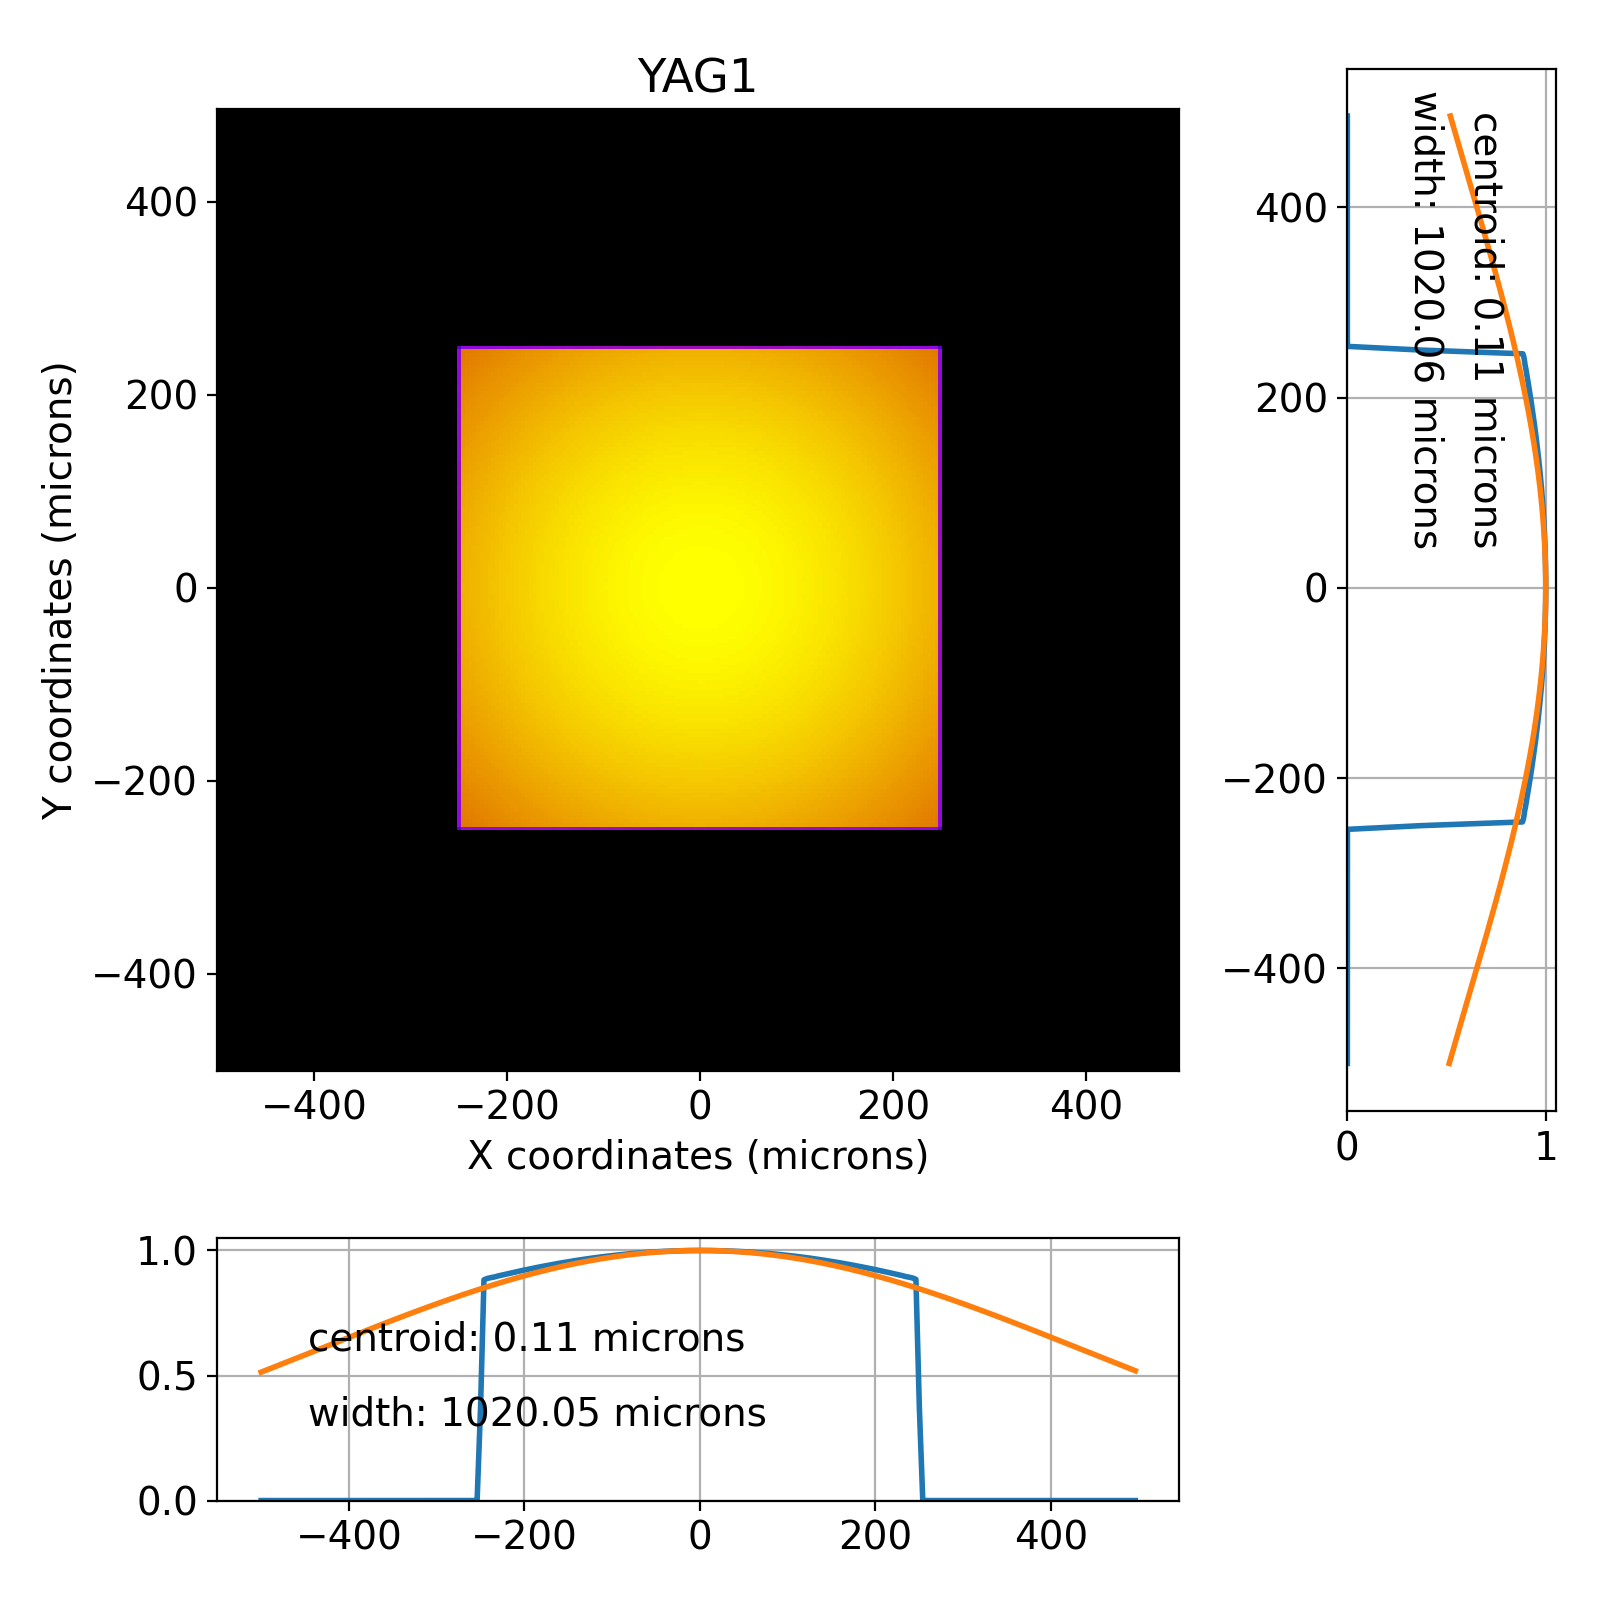

<IPython.core.display.Javascript object>


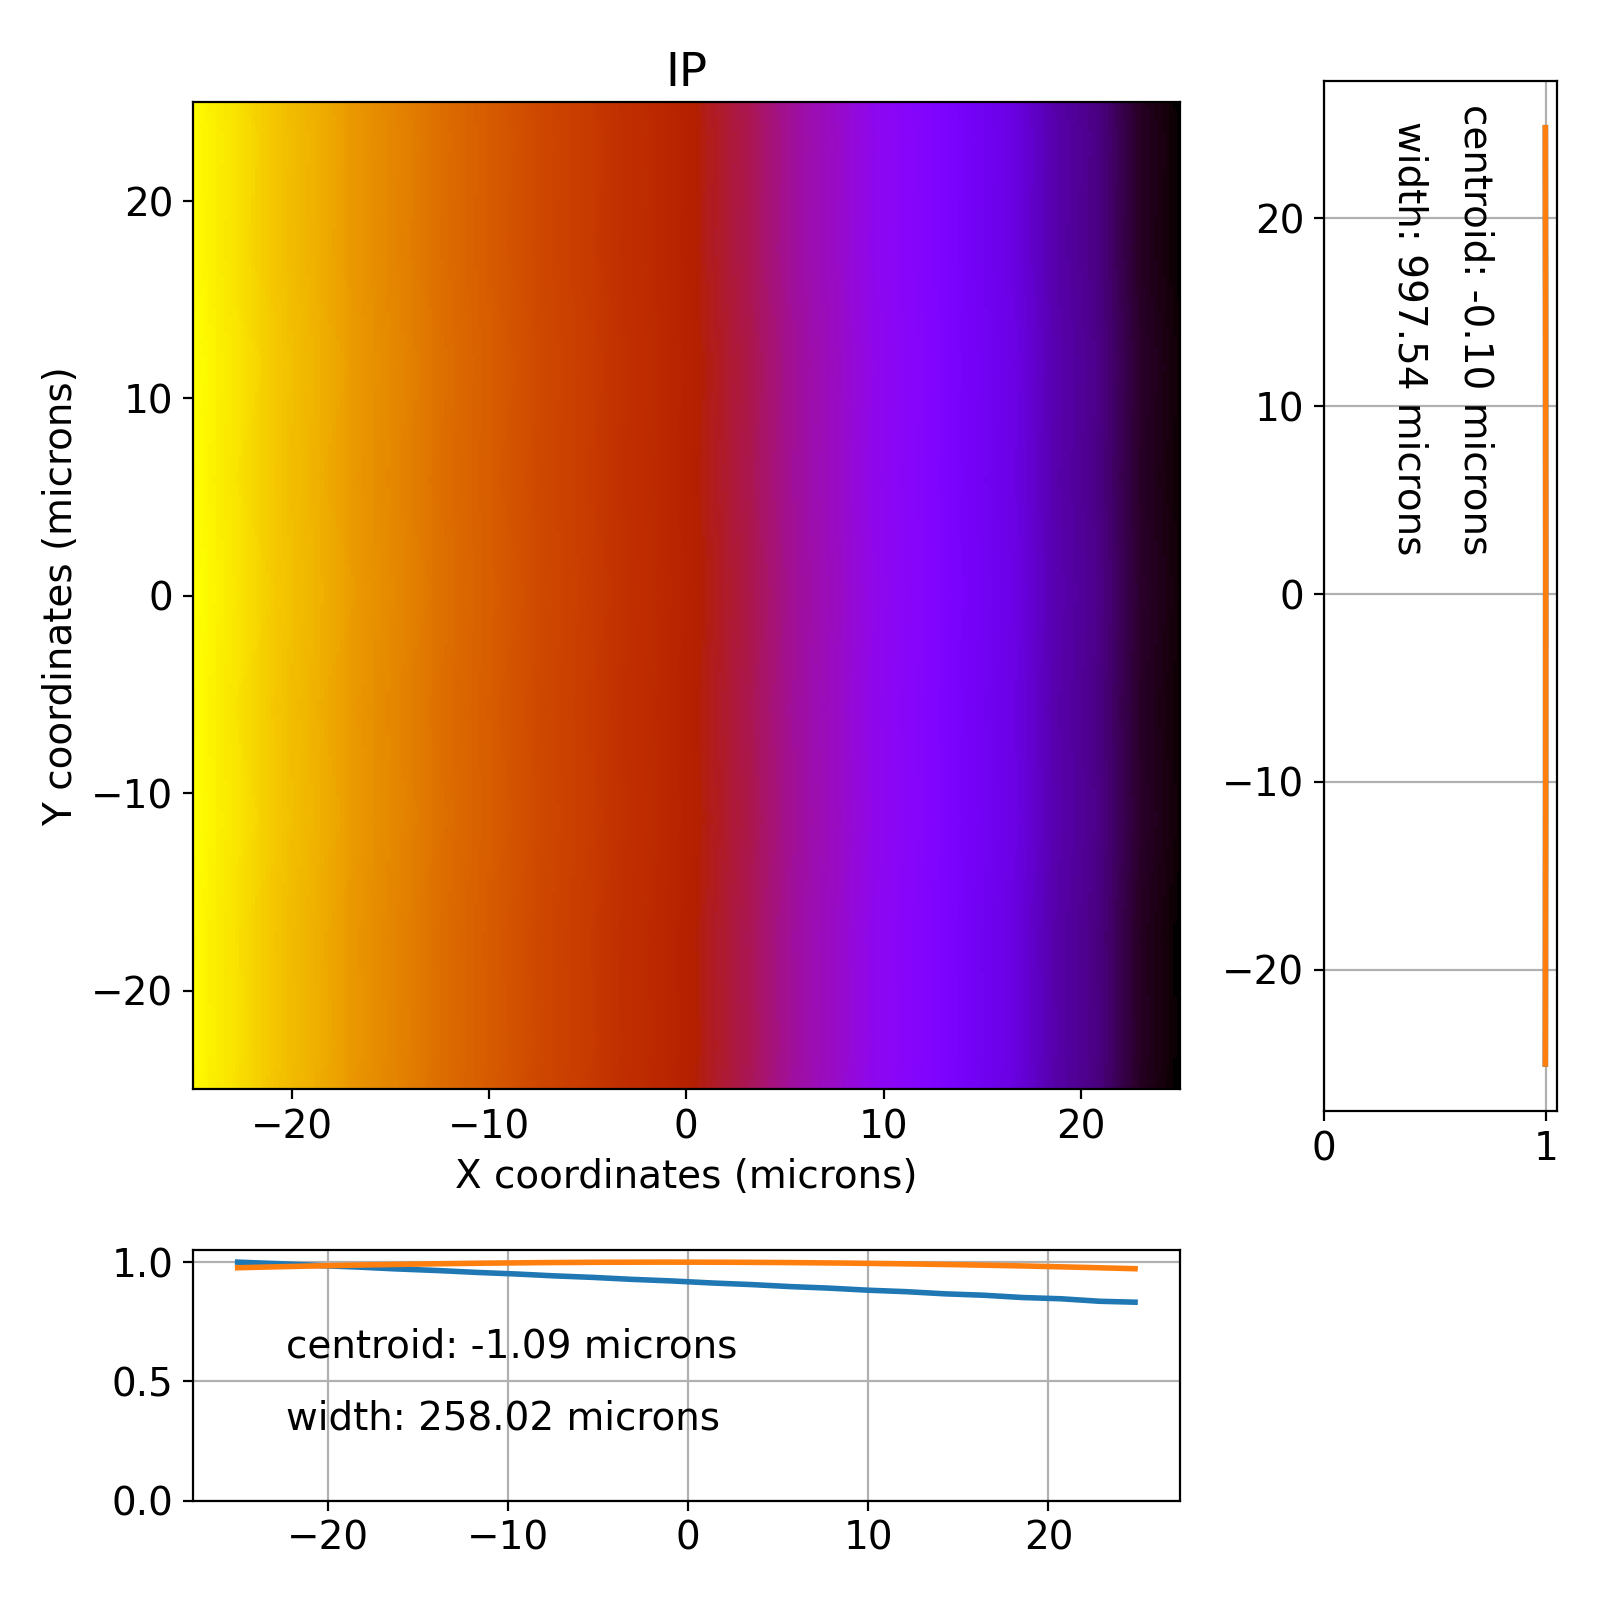

<IPython.core.display.Javascript object>


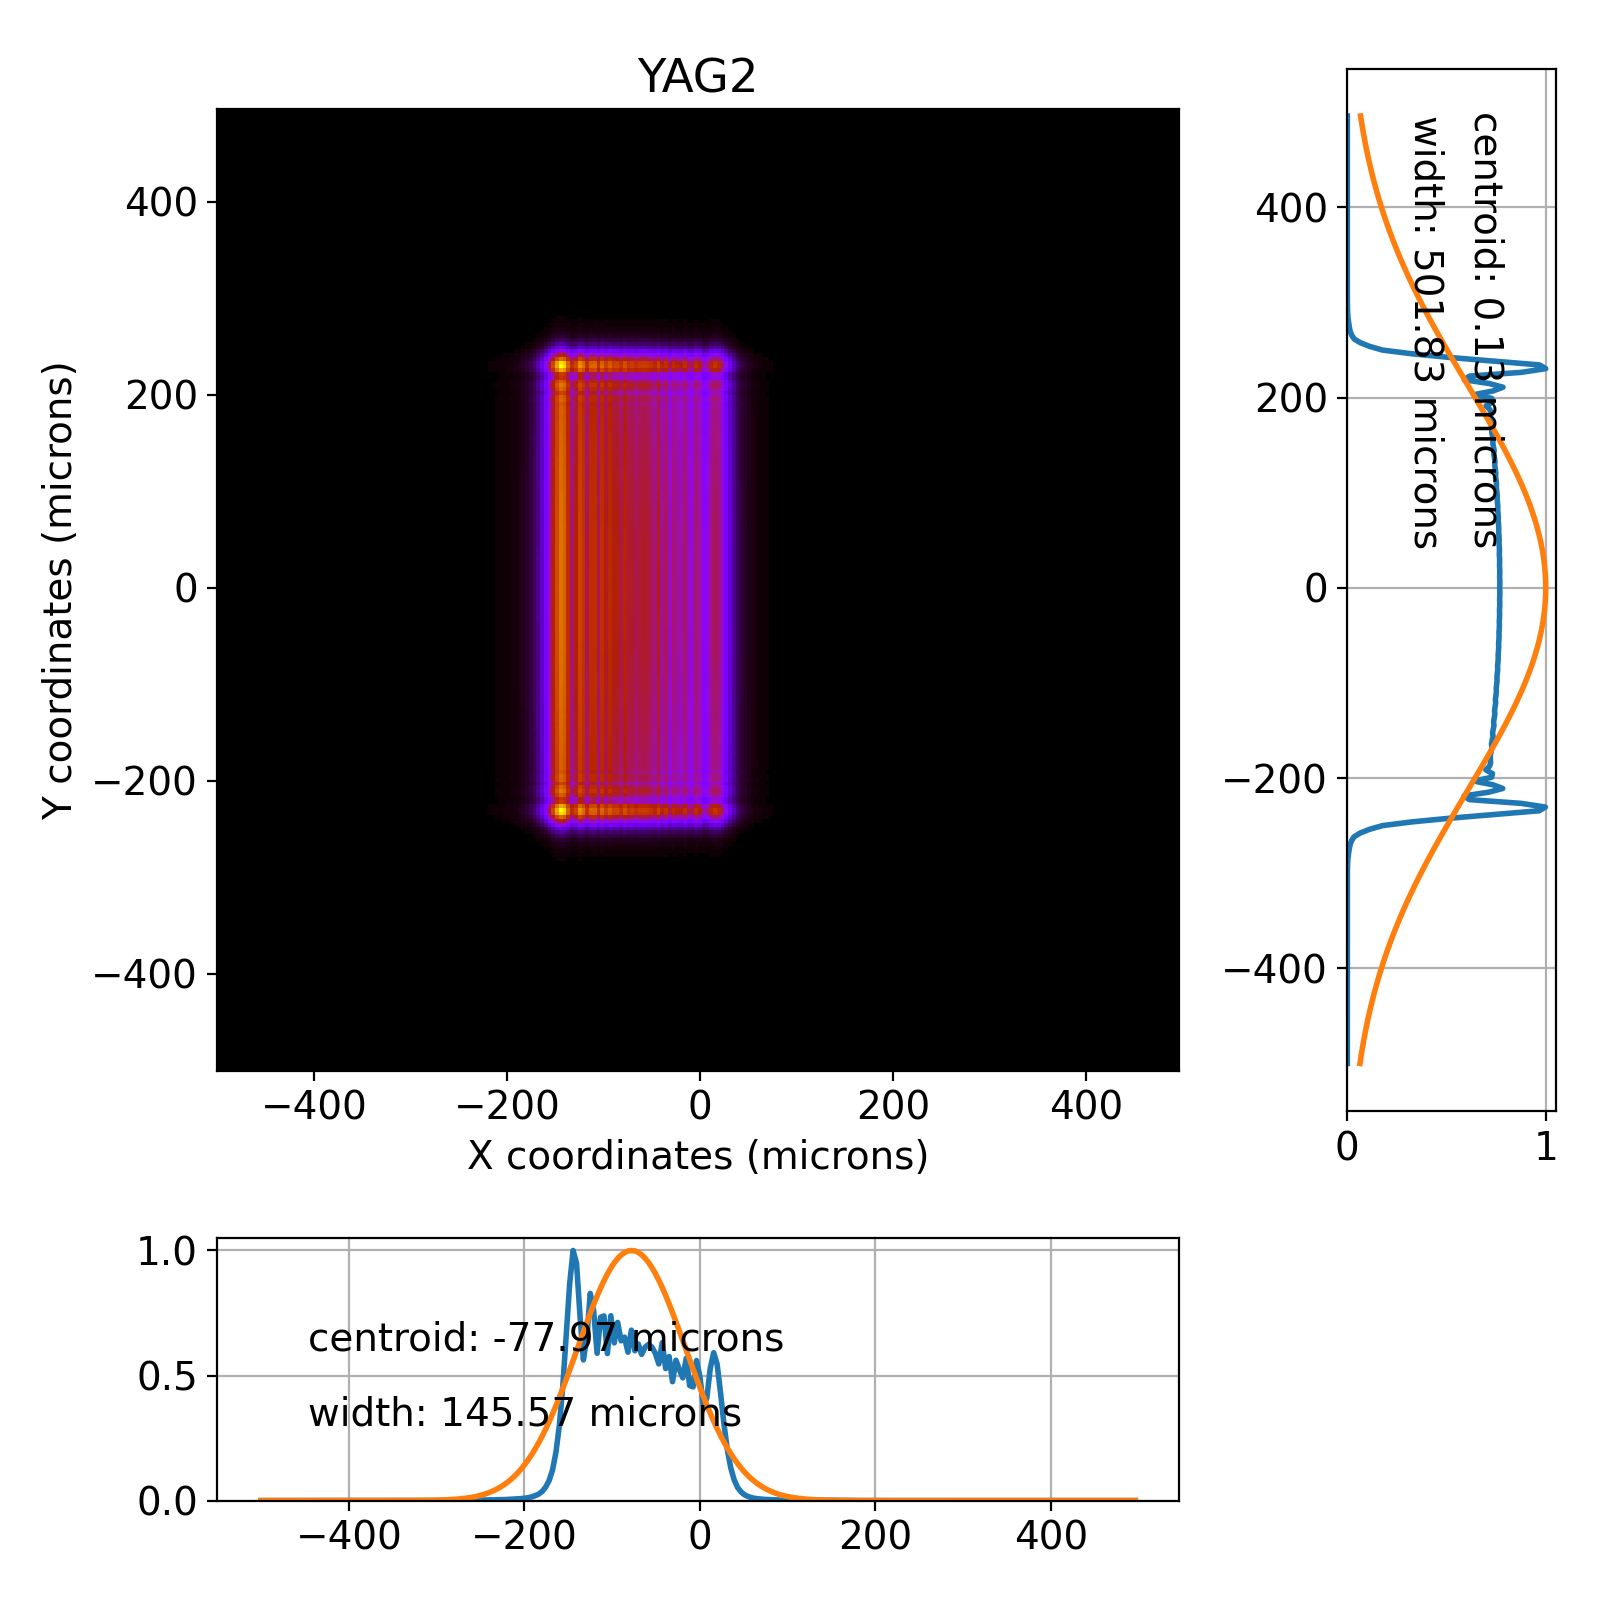

<IPython.core.display.Javascript object>


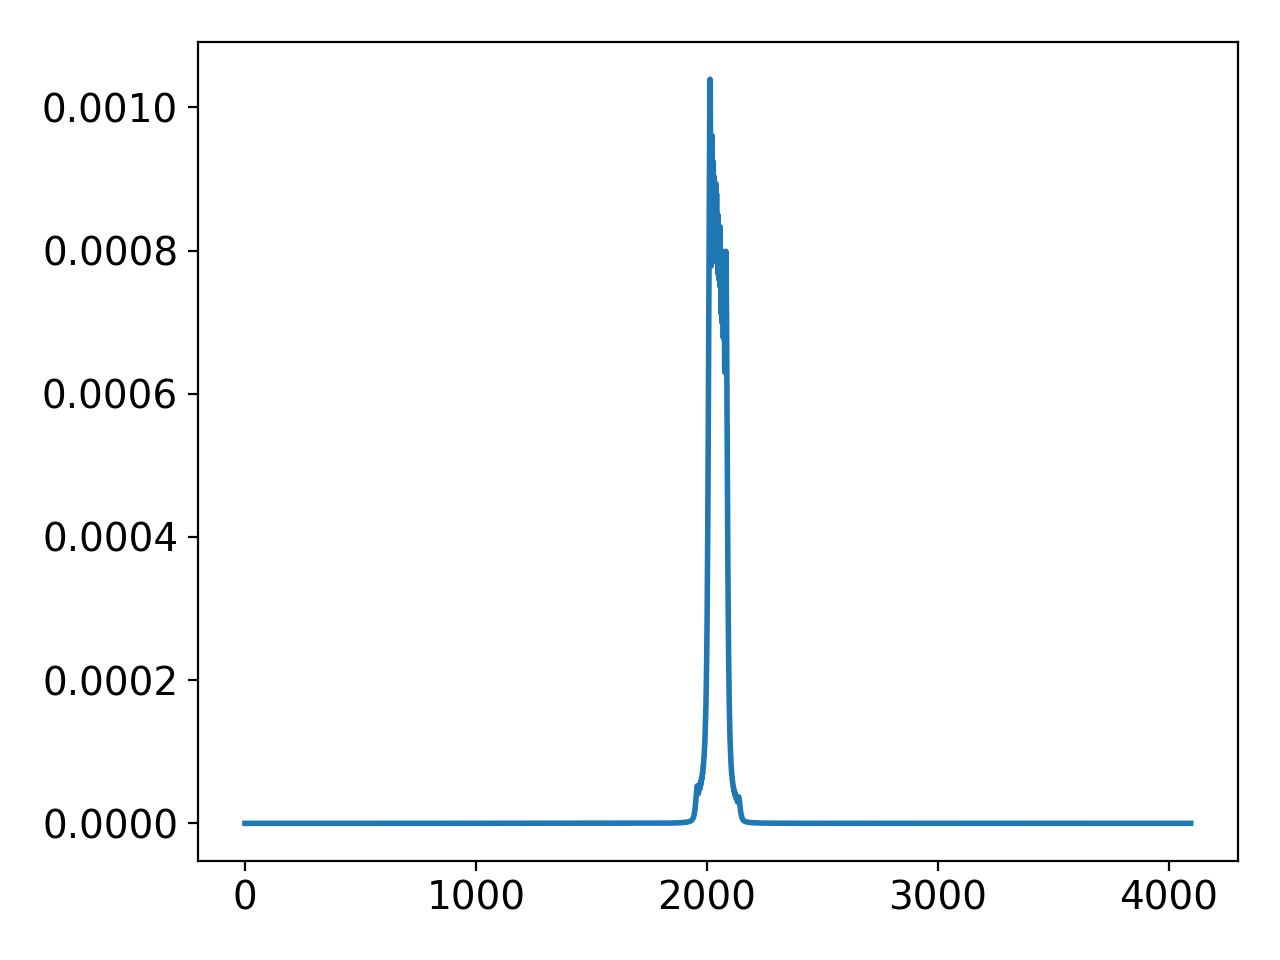

In [6]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.IP.view_beam()
XPP.YAG2.view_beam()
# XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [7]:
beam_params['photonEnergy'] = 9500

pulse_test = beam.Pulse(beam_params=beam_params, tau=5, time_window=500)

In [8]:
%%capture capt
pulse_test.propagate(beamline=XPP, screen_names=['YAG1','YAG2'])

In [10]:
84/(86*2)
print((225-150)/(80+85))
print((.177-.15)/(70+90))

0.45454545454545453
0.00016874999999999998


<IPython.core.display.Javascript object>


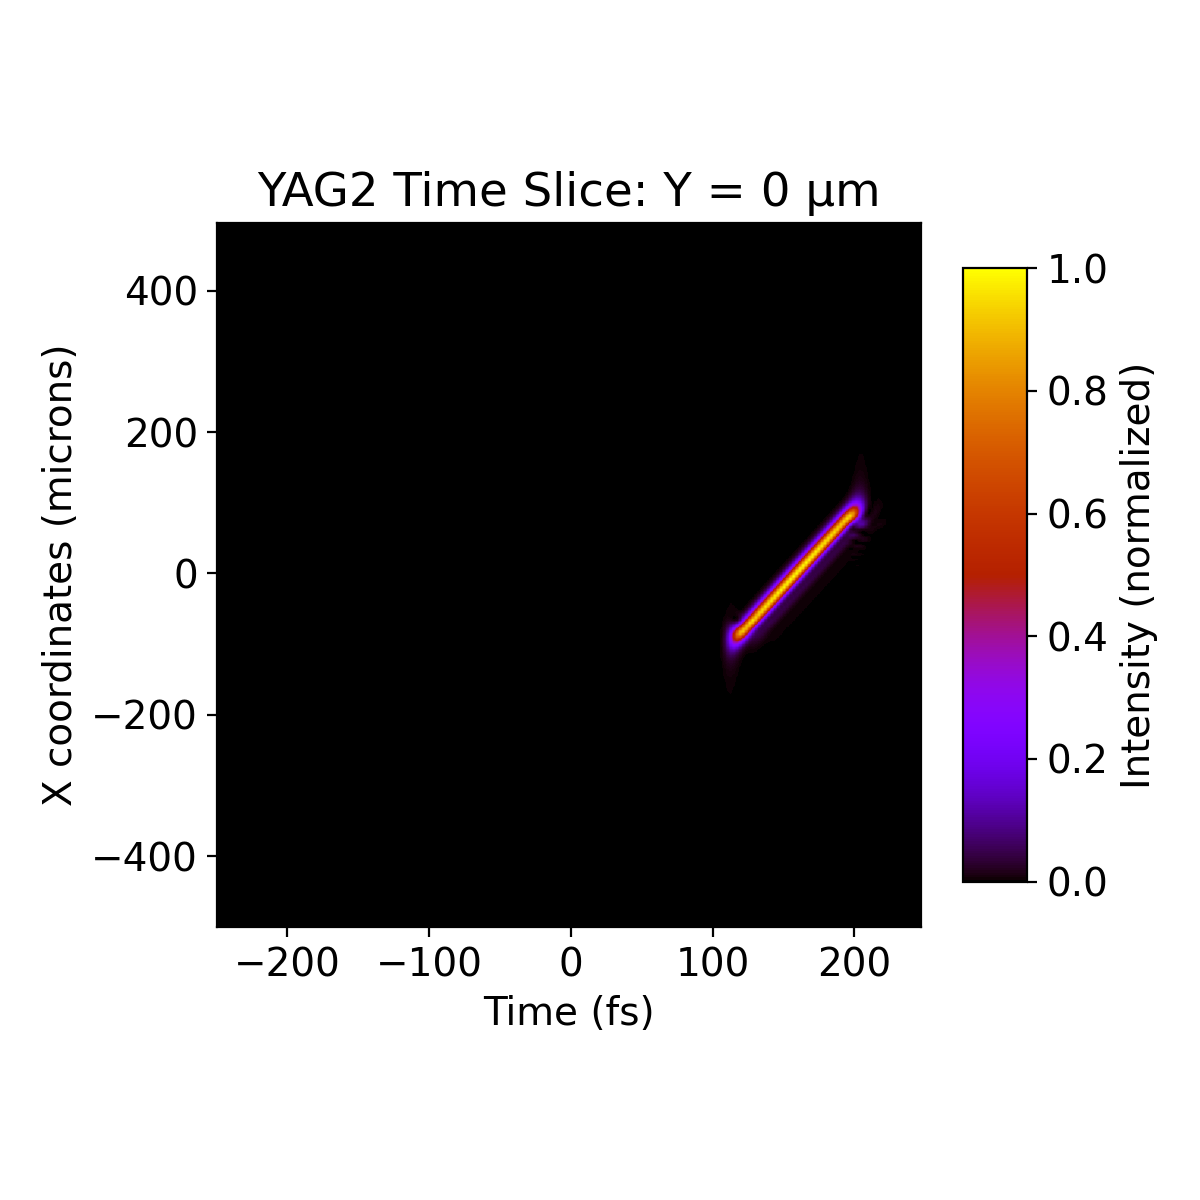

<IPython.core.display.Javascript object>


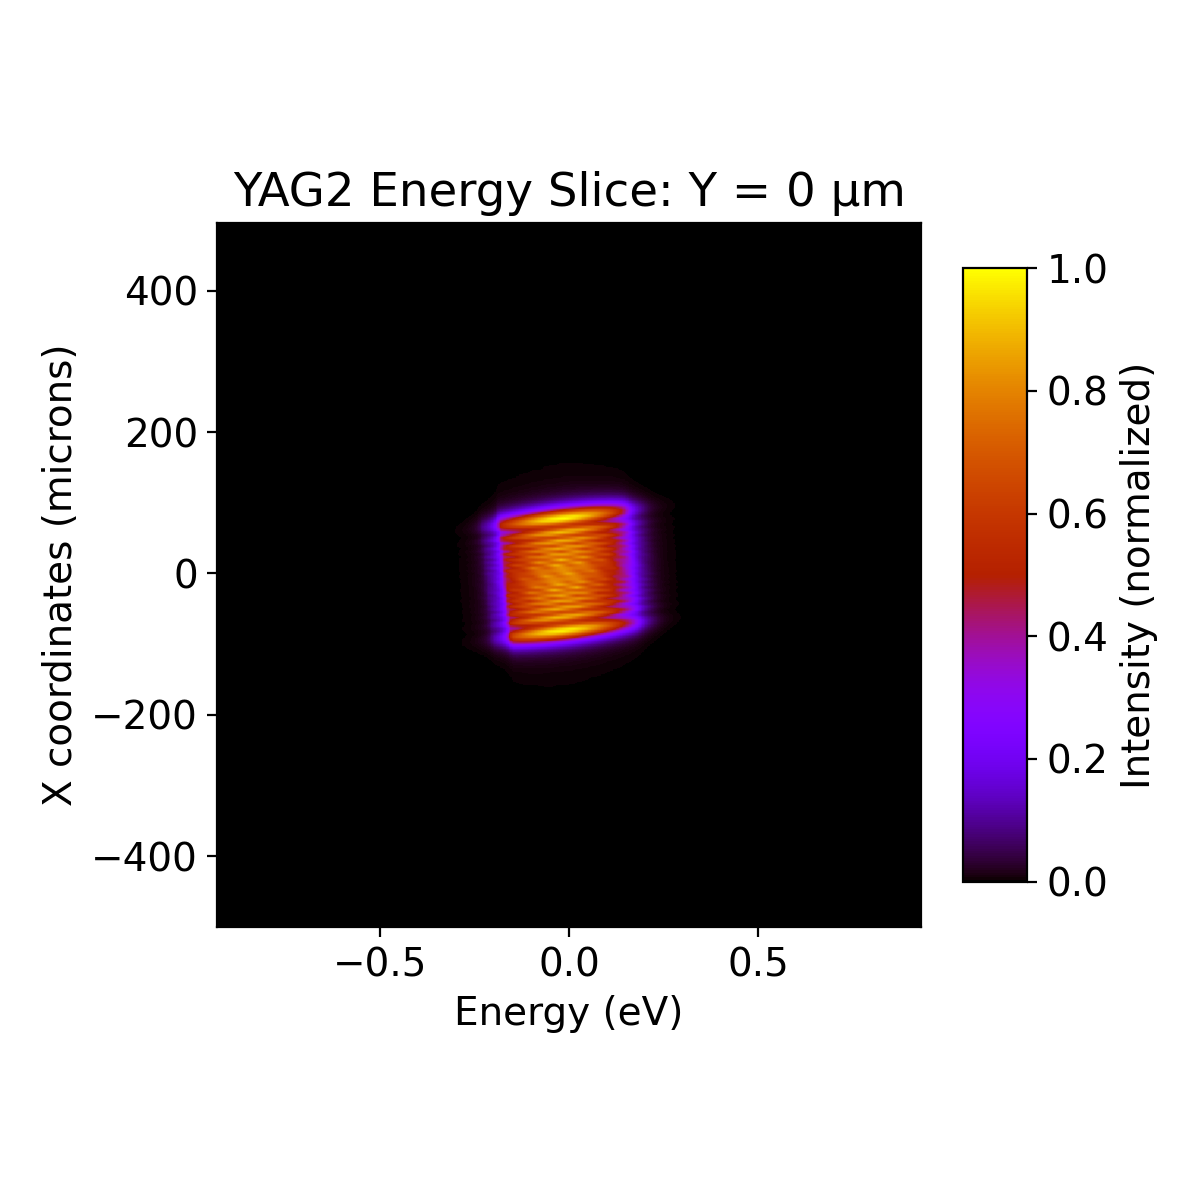

<IPython.core.display.Javascript object>


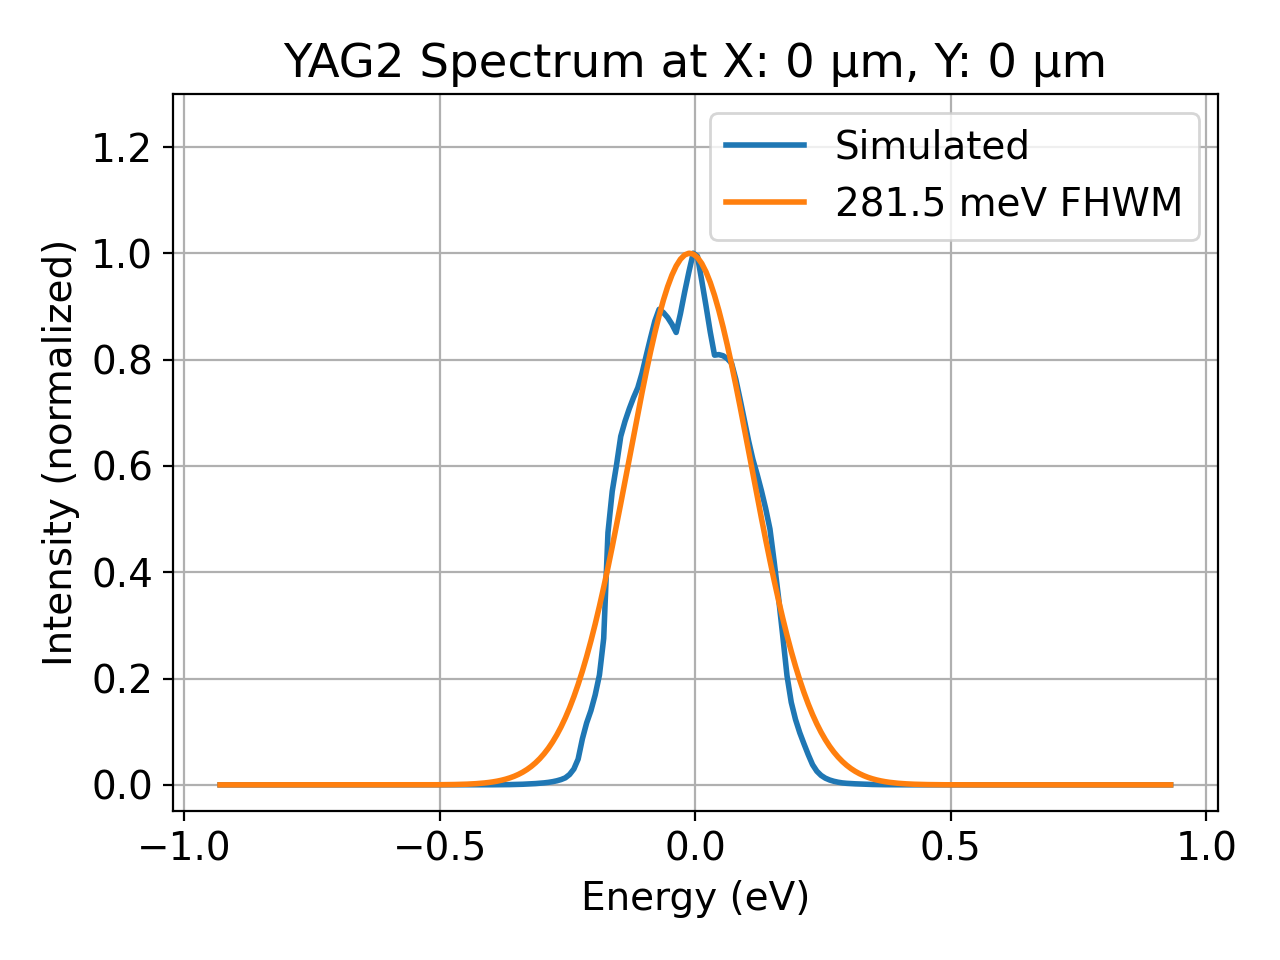

<IPython.core.display.Javascript object>


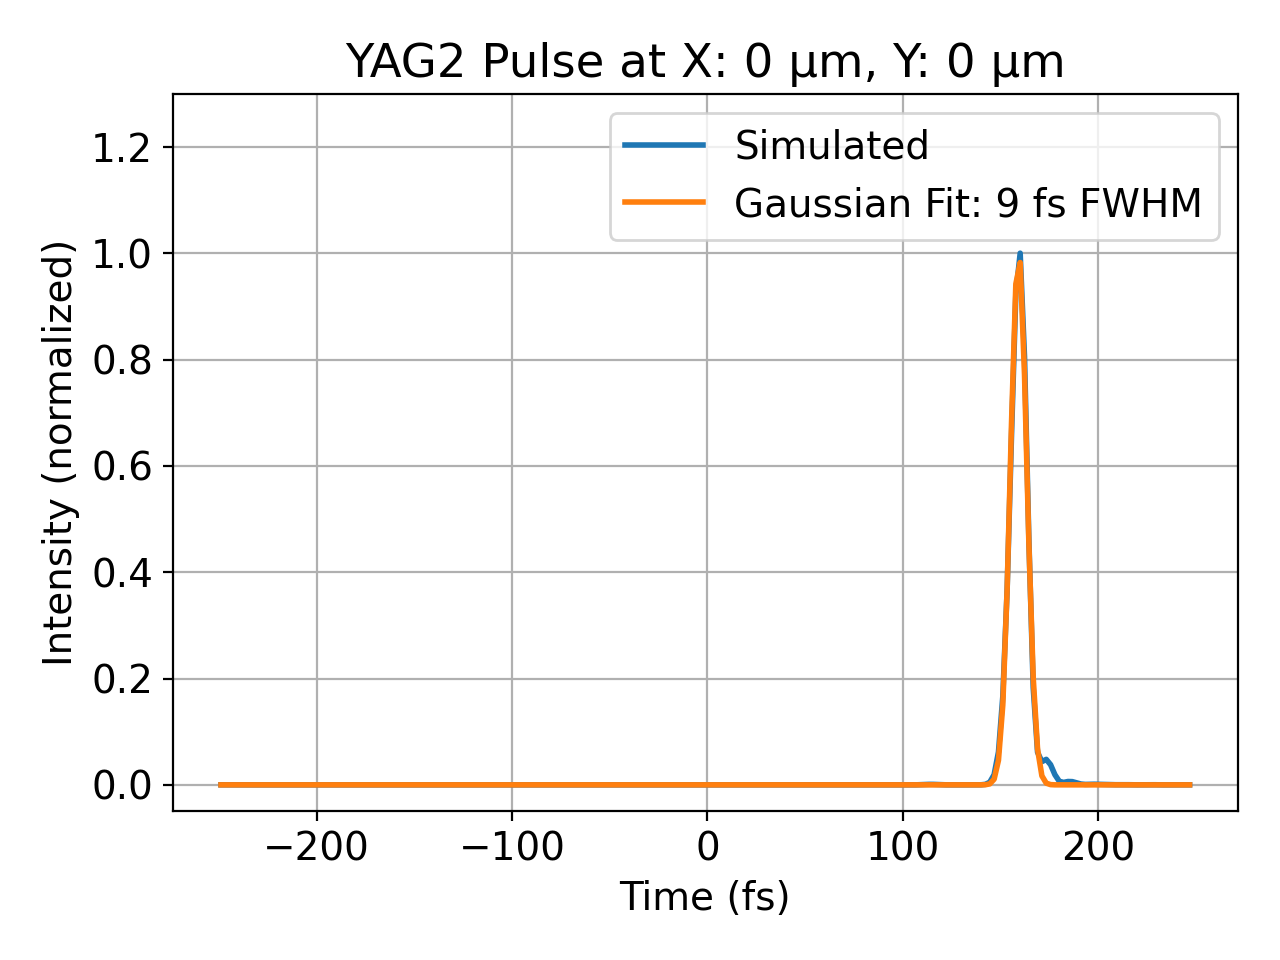

<IPython.core.display.Javascript object>


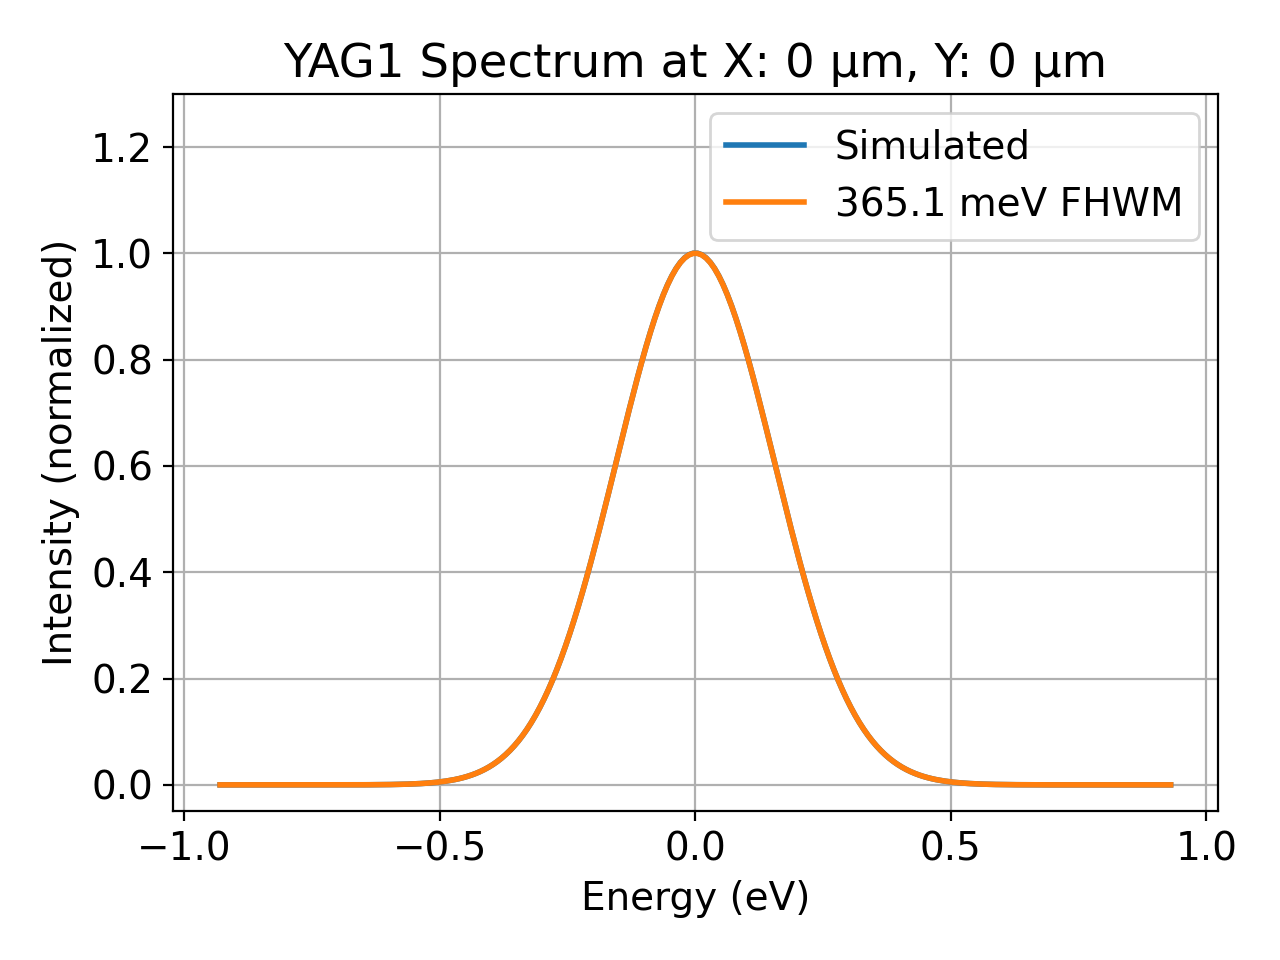

0.45828900625070057
-0.011098293476607068
0.2815322932738259
0.2341794991777007
0.000209286951849112
-1.2453338852960446e-07


In [9]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
# pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
# pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
# pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
# pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')

pulse_test.plot_spectrum('YAG1')

print(pulse_test.pulsefront_tilt('YAG2'))
print(pulse_test.central_energy('YAG2')-pulse_test.E0)
print(pulse_test.pulse_bandwidth('YAG2'))
print(pulse_test.throughput('YAG1','YAG2'))
print(pulse_test.spatial_chirp('YAG2'))
print(pulse_test.spatial_chirp('YAG1'))
# pulse_test.imshow_energy_slice('IP')
# pulse_test.imshow_projection('IP')
# pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


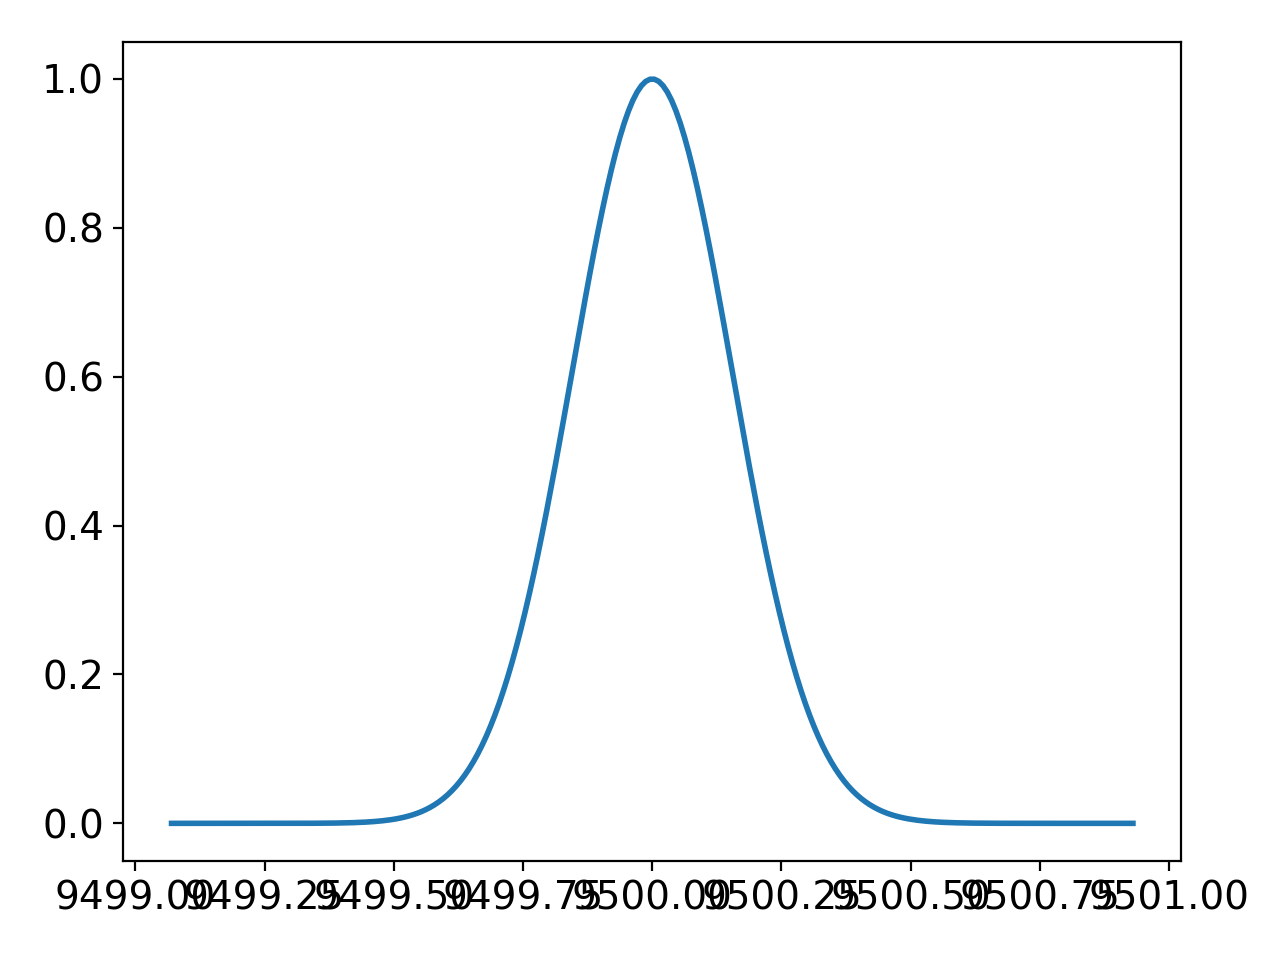

In [68]:
plt.figure()
plt.plot(pulse_test.energy,pulse_test.envelope**2)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8